## Relatorio de Analise

# Criando agrupamentos

In [20]:
import pandas as pd
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [21]:
dados.head(10)

,Unnamed: 0,Unnamed: 0.1,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,5,5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,6,6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,7,7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,9,9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,10,10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,11,11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [22]:
#Atributo mean retorna valor médio 
dados['Valor'].mean()

5046.172821405663

In [23]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [24]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [25]:
grupo_bairro = dados.groupby('Bairro')

In [26]:
for bairro, dados in grupo_bairro:
    print(bairro)


Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [27]:
# Loop para acharmos o valor médio na lista de bairros
for bairro, data in grupo_bairro: 
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [28]:
#Podemos obter o valor medio conforme codigo abaixo
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [29]:
#Utilizando o método round para arrendodarmos os valores
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatística Descritiva

In [31]:
# Usamos o método describe que retorna um DataFrame com as colunas: 
#count a frequência; mean a média; std o desvio padrão; mino valor mínimo; 25% o primeiro quartio, 50% a mediana, 75% o terceiro quartio e max, o valor máximo.
# o método round arredonda os valores
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [32]:
# utilizaremos o método aggregate() que receberá como parâmetro o conjunto de estatísticas que estamos procurando
# o método rename para mudarmos os nomes das colunas
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [33]:
# Vamos utilizar um pacote do python para visualização de dados chamado MatplotLib
# Chamamos o método figsize para configurarmos o tamanho que será representado
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

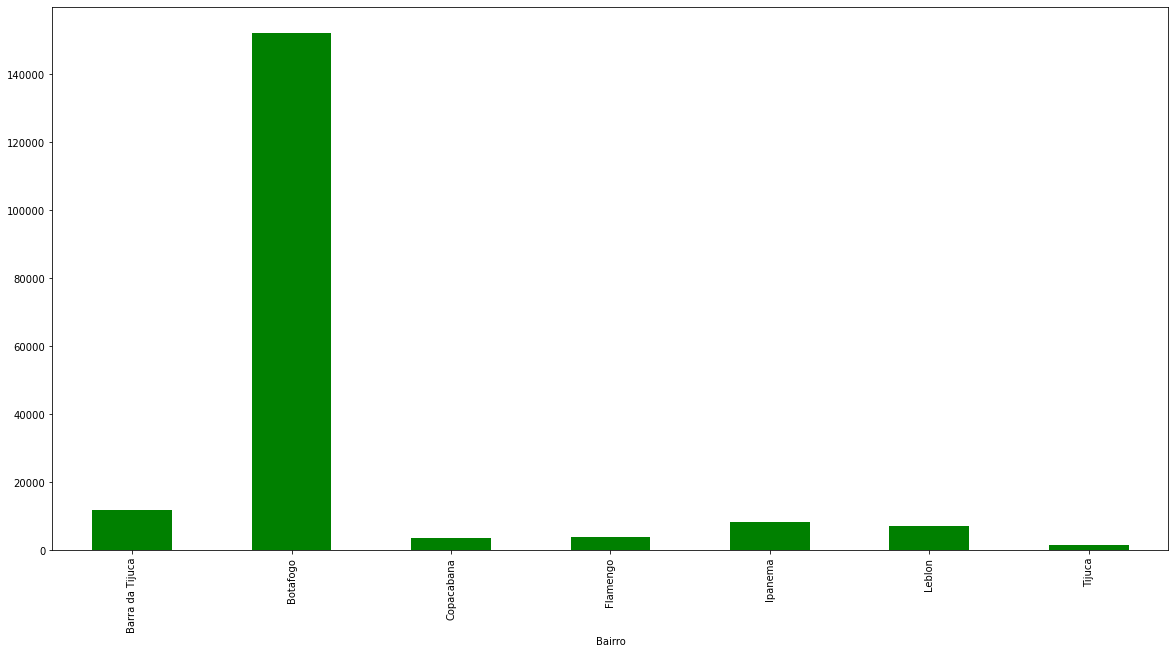

In [34]:
# Vamos criar a váriavel figura para chamarmos o gráfico
figura = grupo_bairro['Valor'].std().plot.bar(color = 'green')


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

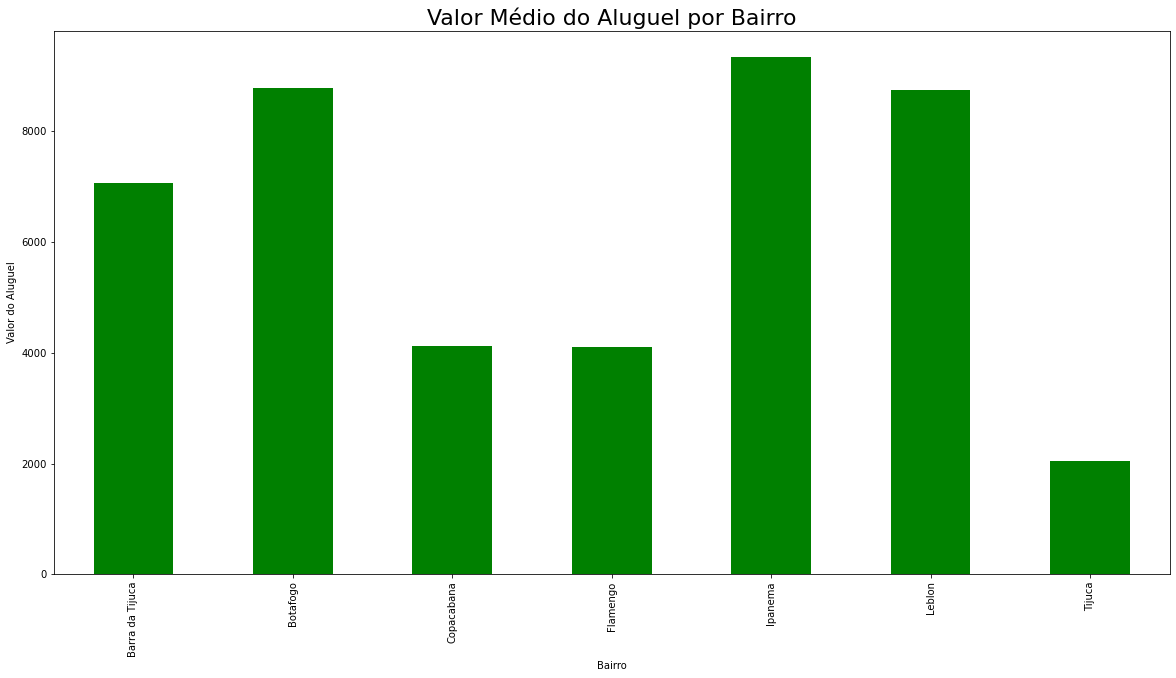

In [36]:
# Observamos um outlier no bairro Botafogo. Faremos algumas configurações em nosso gráfico: coletaremos a média mean() e utilizaremos o set_ylabel() para nomear o eixo Y de Valor do Aluguel. 
#Por fim, daremos o título fig.set_title() de Valor Médio do Aluguel Por Bairro.
#

figura = grupo_bairro['Valor'].mean().plot.bar(color = 'green')
figura.set_ylabel('Valor do Aluguel')
figura.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22}) # Alteramos o título do gráfico